In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data
data = pd.read_csv('heart_disease.csv')

In [3]:
# Check the data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data.shape

(319795, 18)

In [5]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319789 non-null  float64
 2   Smoking           319721 non-null  object 
 3   AlcoholDrinking   319680 non-null  object 
 4   Stroke            319774 non-null  object 
 5   PhysicalHealth    319778 non-null  float64
 6   MentalHealth      319781 non-null  float64
 7   DiffWalking       319762 non-null  object 
 8   Sex               319482 non-null  object 
 9   AgeCategory       319751 non-null  object 
 10  Race              319756 non-null  object 
 11  Diabetic          319762 non-null  object 
 12  PhysicalActivity  319779 non-null  object 
 13  GenHealth         319302 non-null  object 
 14  SleepTime         319576 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# Basic statistics of numeric and float values 
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319789.000000,319778.000000,319781.000000,319576.000000
mean,28.325348,3.371605,3.898384,7.096922
std,6.356134,7.950662,7.955291,1.436165
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [7]:
# For qualitative values
data.describe(include="object")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319721,319680,319774,319762,319482,319751,319756,319762,319779,319302,319795,319778,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187843,297908,307706,275363,167591,34143,245189,269626,247946,113657,276923,308001,289976


In [8]:
# Check if the dataset contains any null values (N/A)
data.isna().sum()

HeartDisease          0
BMI                   6
Smoking              74
AlcoholDrinking     115
Stroke               21
PhysicalHealth       17
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           493
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [9]:
data[data['BMI'].isna()] # 6 Null values - To get the all the rows containing null values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
7,No,NaN,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,NaN,No
21,No,NaN,No,No,No,2.0,5.0,No,Female,70-74,White,Yes,No,Very good,7.0,No,NaN,No
26,No,NaN,Yes,No,No,21.0,8.0,Yes,Female,65-69,White,No,Yes,Fair,9.0,No,No,No
42,Yes,NaN,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
72,No,NaN,No,No,No,0.0,5.0,No,Male,50-54,White,Yes,Yes,Good,10.0,Yes,No,No
200,No,NaN,No,NaN,No,1.0,30.0,No,Female,45-49,White,No,Yes,Very good,8.0,No,No,Yes


In [10]:
# Get the mean value of BMI column
bmi_mean = data['BMI'].mean()

# Fill N/A values of the BMI column with mean value
data['BMI'].fillna(bmi_mean, inplace=True)

/tmp/ipykernel_41806/3695007989.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI'].fillna(bmi_mean, inplace=True)


In [11]:
# Check filled values of corresponding N/A values
data['BMI'][data['BMI'].isna()]

Series([], Name: BMI, dtype: float64)

In [12]:
data[data['Smoking'].isna()].head() # 74 Null values

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
15,No,29.18,NaN,No,No,1.0,0.0,No,Female,50-54,White,No,Yes,Very good,6.0,No,NaN,No
32,No,45.35,NaN,No,No,30.0,0.0,Yes,Male,70-74,White,Yes,No,Good,8.0,No,No,No
52,No,27.12,NaN,No,No,2.0,0.0,No,Male,80 or older,White,Yes,Yes,Fair,7.0,No,No,Yes
97,No,28.35,NaN,NaN,No,20.0,0.0,No,Female,65-69,White,No,No,Very good,8.0,No,No,No
142,Yes,31.48,NaN,NaN,Yes,20.0,20.0,Yes,Male,65-69,Black,No,No,Fair,7.0,Yes,No,No


In [13]:
# Get the most frequent value from Smoking column
smoking_mode = data['Smoking'].mode()[0]

# Assign the mode value in place of Null values 
data['Smoking'].fillna(smoking_mode, inplace=True)

/tmp/ipykernel_41806/2778366069.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Smoking'].fillna(smoking_mode, inplace=True)


In [14]:
# Check filled values of corresponding N/A values
data['Smoking'][data['Smoking'].isna()]

Series([], Name: Smoking, dtype: object)

In [15]:
# Alcohol mode
alcohol_mode = data['AlcoholDrinking'].mode()[0]

# Fill the null values using the mode
data['AlcoholDrinking'].fillna(alcohol_mode, inplace=True)

/tmp/ipykernel_41806/1502011877.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AlcoholDrinking'].fillna(alcohol_mode, inplace=True)


In [16]:
# Stroke mode
stroke_mode = data['Stroke'].mode()[0]

# Fill null values using the mode
data['Stroke'].fillna(stroke_mode, inplace=True)

/tmp/ipykernel_41806/3032867856.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Stroke'].fillna(stroke_mode, inplace=True)


In [17]:
# Physical Health Mean
ph_mean = data['PhysicalHealth'].mean()

# Assign null values using mean
data['PhysicalHealth'].fillna(ph_mean, inplace=True)

/tmp/ipykernel_41806/1242561474.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PhysicalHealth'].fillna(ph_mean, inplace=True)


In [18]:
data.isna().sum()

HeartDisease          0
BMI                   0
Smoking               0
AlcoholDrinking       0
Stroke                0
PhysicalHealth        0
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           493
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [19]:
data['MentalHealth'].describe()

count    319781.000000
mean          3.898384
std           7.955291
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

In [20]:
# Mean mental health
mh_mean = data['MentalHealth'].mean()

# Fill the null values
data['MentalHealth'].fillna(mh_mean, inplace=True)

/tmp/ipykernel_41806/1690770379.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MentalHealth'].fillna(mh_mean, inplace=True)


In [21]:
data['DiffWalking'].describe()

count     319762
unique         2
top           No
freq      275363
Name: DiffWalking, dtype: object

In [22]:
# Get the most repeated frequency
dw_mode = data['DiffWalking'].mode()[0]

# Fill the null values with mode
data['DiffWalking'].fillna(dw_mode, inplace=True)

/tmp/ipykernel_41806/449143463.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DiffWalking'].fillna(dw_mode, inplace=True)


In [23]:
data['Sex'].describe()

count     319482
unique         2
top       Female
freq      167591
Name: Sex, dtype: object

In [24]:
# I am not sure what to do with this
data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)

/tmp/ipykernel_41806/1221781384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)


In [25]:
# How does age column look?
data['AgeCategory'].describe()

count     319751
unique        13
top        65-69
freq       34143
Name: AgeCategory, dtype: object

In [26]:
# Mode of AgeCategory
mode_age = data['AgeCategory'].mode()[0]

# Fill the N/A's with mode
data['AgeCategory'].fillna(mode_age, inplace=True)

/tmp/ipykernel_41806/910458510.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AgeCategory'].fillna(mode_age, inplace=True)


In [27]:
# Race doesn't play much role so we can remove it
data = data.drop(['Race'], axis=1)

In [28]:
data['Diabetic'].describe()

count     319762
unique         4
top           No
freq      269626
Name: Diabetic, dtype: object

In [29]:
diabetic_mode = data['Diabetic'].mode()[0]
data['Diabetic'].fillna(diabetic_mode, inplace=True)

/tmp/ipykernel_41806/3328188750.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Diabetic'].fillna(diabetic_mode, inplace=True)


In [30]:
data['PhysicalActivity'].describe()

count     319779
unique         2
top          Yes
freq      247946
Name: PhysicalActivity, dtype: object

In [31]:
physical_mode = data['PhysicalActivity'].mode()[0]
data['PhysicalActivity'].fillna(physical_mode, inplace=True)

/tmp/ipykernel_41806/2253024628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PhysicalActivity'].fillna(physical_mode, inplace=True)


In [32]:
data['GenHealth'].describe()

count        319302
unique            5
top       Very good
freq         113657
Name: GenHealth, dtype: object

In [33]:
# Find null rows
data[data['GenHealth'].isna()].head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
252308,No,20.98,No,No,No,0.0,0.0,No,Female,70-74,No,Yes,NaN,8.0,No,No,No
252309,No,21.63,No,No,No,3.0,0.0,No,Female,80 or older,No,Yes,NaN,8.0,No,No,Yes
252310,Yes,34.46,No,No,No,0.0,0.0,No,Male,70-74,No,Yes,NaN,7.0,No,No,No
252311,No,26.54,No,No,No,0.0,0.0,No,Male,70-74,No,No,NaN,10.0,No,No,No
252312,No,26.63,No,No,No,2.0,8.0,No,Female,18-24,No,No,NaN,7.0,No,No,No


In [34]:
# Mode general health
health_mode = data['GenHealth'].mode()[0]

data['GenHealth'].fillna(health_mode, inplace=True)

/tmp/ipykernel_41806/3566229439.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GenHealth'].fillna(health_mode, inplace=True)


In [35]:
data['GenHealth'].isna().sum()

0

In [36]:
data.isna().sum()

HeartDisease          0
BMI                   0
Smoking               0
AlcoholDrinking       0
Stroke                0
PhysicalHealth        0
MentalHealth          0
DiffWalking           0
Sex                   0
AgeCategory           0
Diabetic              0
PhysicalActivity      0
GenHealth             0
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [37]:
data['SleepTime'].describe()

count    319576.000000
mean          7.096922
std           1.436165
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

In [38]:
# Average sleeptime
mean_sleeptime = data['SleepTime'].mean()

data['SleepTime'].fillna(mean_sleeptime, inplace=True)

/tmp/ipykernel_41806/1387530988.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SleepTime'].fillna(mean_sleeptime, inplace=True)


In [39]:
kd_mode = data['KidneyDisease'].mode()[0]
data['KidneyDisease'].fillna(kd_mode, inplace=True)

/tmp/ipykernel_41806/926812844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['KidneyDisease'].fillna(kd_mode, inplace=True)


In [40]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### Data Encoding

In [41]:
# The list of columns to encode'AgeCategory'
cols_to_encode = ['Sex', 'Diabetic', 'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

label_encoders = {}
# Encode columns in bulk
for col in cols_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [42]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,2,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,2,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,0,1,Very good,8.0,0,0,0


### Checking Imbalance

In [1]:
heart_disease_counts = data['HeartDisease'].value_counts()
heart_disease_counts

NameError: name 'data' is not defined

In [44]:
imbalance_ratio = heart_disease_counts.min() / heart_disease_counts.max()
f"Imbalance ratio: {imbalance_ratio:.2}"

'Imbalance ratio: 0.094'

### Visualizations

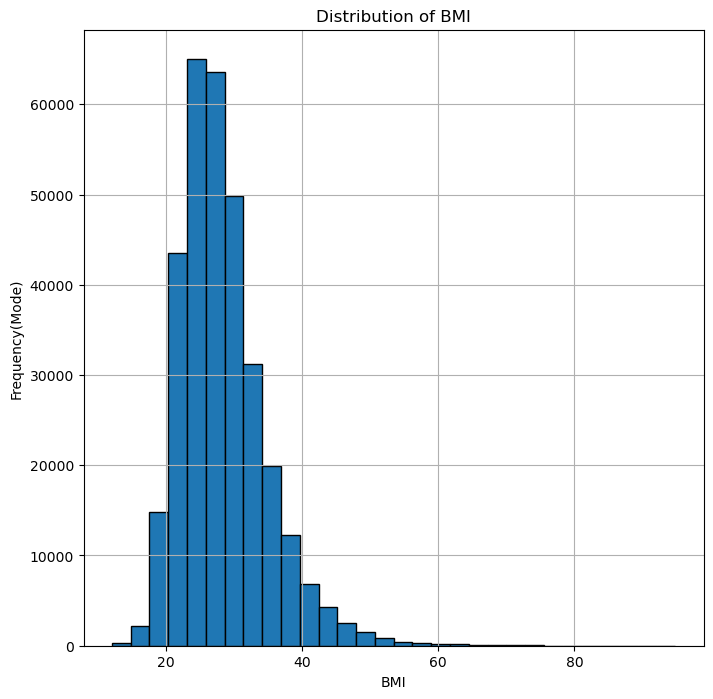

In [45]:
# Histogram of BMI
plt.figure(figsize=(8, 8))
data['BMI'].hist(bins=30, edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency(Mode)')
plt.show()

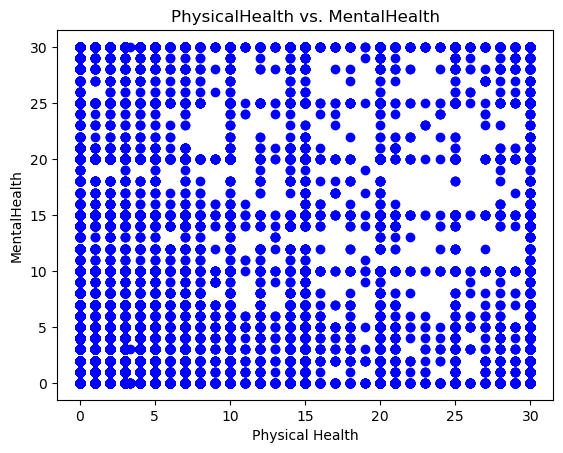

In [46]:
# Relation between sleeptime and mental health
plt.title('PhysicalHealth vs. MentalHealth')
plt.scatter(data['PhysicalHealth'], data['MentalHealth'], c='blue')
plt.xlabel('Physical Health')
plt.ylabel('MentalHealth')
plt.show()

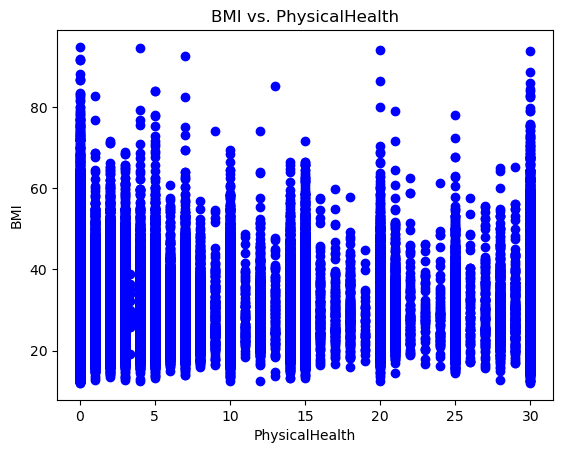

In [47]:
# Relation between bmi and physical health
plt.title('BMI vs. PhysicalHealth')
plt.scatter(data['PhysicalHealth'], data['BMI'], c='blue')
plt.xlabel('PhysicalHealth')
plt.ylabel('BMI')
plt.show()

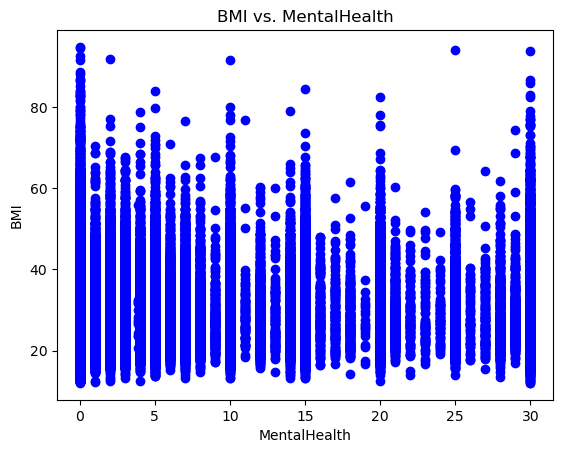

In [48]:
# Relation between bmi and mental health
plt.title('BMI vs. MentalHealth')
plt.scatter(data['MentalHealth'], data['BMI'], c='blue')
plt.xlabel('MentalHealth')
plt.ylabel('BMI')
plt.show()